In [0]:
#Python Version - 3.x
#TensorFlow - 2.x

In [2]:
import sys;sys.version

'3.6.9 (default, Nov  7 2019, 10:44:02) \n[GCC 8.3.0]'

In [0]:
# How to check RAM

In [4]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022         563       10400           0        2058       12183
Swap:             0           0           0


In [5]:
! nvidia-smi

Sun Mar  1 14:03:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [7]:
! df -h | grep sda1

/dev/sda1        75G   38G   38G  50% /opt/bin


In [0]:
# If you want to install tensorflow - pip install tensorflow==2.0.0   #us e this line if on local Jupyter system

In [9]:
%tensorflow_version 2.0.0     #use this line if on COlab

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [11]:
tf.__version__

'2.1.0'

In [12]:
tf.keras.__version__

'2.2.4-tf'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [16]:
#Input to the model is images and output is label 
# Dataset is divided in 2 parts - test & train 
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [17]:
type(x_train), type(y_train), type(x_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [18]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
#Channels are R G B A

In [0]:
#Grayscale has only 1 channel

In [23]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

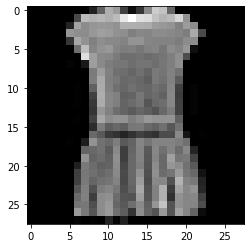

In [28]:
plt.imshow(x_train[3],cmap="gray")

In [29]:

print( y_train[3])


3



```
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

# This is formatted as code
```



In [30]:
x_train[3].max(),x_train[3].min()

(255, 0)

In [31]:
x_train[3].shape

(28, 28)

In [34]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [0]:
#normalize dataset

x_train = x_train / 255

In [0]:
# [5, 10, 15]  - [0.33, 0.66, 1]  - MinMaxScaler

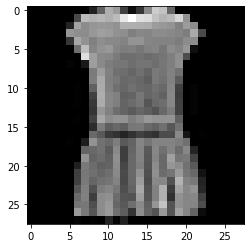

In [39]:
plt.imshow(x_train[3],cmap="gray")

In [40]:
x_train[3].max(),x_train[3].min()

(1.0, 0.0)

In [0]:
# [I, II, III]
# We do onehot encoding for categorical values
# I   1     [1,0,0]
# II  2     [0,1,0]
# III 3     [0,0,1]

In [0]:
# Cat       1     [1, 0, 0, 0]
# Dog       2     [0, 1, 0, 0]
# Elephant  3     [0, 0, 1, 0]
# Horse     4     [0, 0, 0, 1]

In [0]:
from tensorflow.keras.utils import to_categorical

In [45]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [46]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
y_train= to_categorical(y_train)

In [0]:
# 1. Loaded MNIST Dataset
# 2. normalized x train (MinMaxScaler similar to dividing by maxValue)
# 3. normalized y train (onehot encoding)

In [0]:
x_test = x_test / 255

In [0]:
y_test = to_categorical(y_test)

In [0]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [0]:
# SGD stochastic gradient desent

In [0]:
mod=Sequential()
mod.add(Flatten(input_shape=(28,28)))
mod.add(Dense(512,activation=relu))
mod.add(Dense(10,activation=softmax))

In [56]:
mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
mod.compile(optimizer=SGD(),loss=categorical_crossentropy,metrics=["acc"])

In [62]:
#Run the model
mod.fit(x_train,y_train, 1024, 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4971 - acc: 0.8352
Epoch 2/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4947 - acc: 0.8358
Epoch 3/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4925 - acc: 0.8359
Epoch 4/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4903 - acc: 0.8364
Epoch 5/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4882 - acc: 0.8377
Epoch 6/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4862 - acc: 0.8377
Epoch 7/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4841 - acc: 0.8382
Epoch 8/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4825 - acc: 0.8389
Epoch 9/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4805 - acc: 0.8396
Epoch 10/20
60000/60000 [==============================] - 0s 6us/sa